In [1]:
import os
import opyplus as op
import warnings
warnings.filterwarnings("ignore")

eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

# idf path
idf_path = os.path.join(
    eplus_dir_path,
    "ExampleFiles",
    "DOEE-EnergyPlus V0.1.2(WEST).idf"
)

# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_Tehran-Mehrabad.407540_ITMY.epw"
)

base_dir_path = os.path.join(
    eplus_dir_path,
    "Result","Tehran(SOUTH)"
) 
# run simulation
s = op.simulate(
    idf_path,
    epw_path,
    base_dir_path,
    simulation_name=None,
    print_function=None,
    beat_freq=None,
)

print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (C:\\EnergyPlusV9-2-0\Result\Tehran(SOUTH))


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2022.02.05 22:31,
   ** Warning ** ProcessScheduleInput: Schedule:Day:Interval="SCHEDULE DAY 1", , One or more values are not integer as required by Schedule Type Limits Name=ONOFF
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** GetHTSurfaceData: Surfaces with interface to Ground found but no "Ground Temperatures" were input.
   **   ~~~   ** Found first in surface=SURFACE 400
   **   ~~~   ** Defaults, constant throughout the year of (18.0) will be used.
   ** Warning ** GetSurfaceData: Construction INTERIOR CEILING of interzone surface SURFACE 405 does not have the same materials in the r

In [2]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year 2013
hourly_output.create_datetime_index(2018)

# get Pandas dataframe
df = hourly_output.get_data()

df

,month,day,hour,minute,end_minute,dst,day_type,"thermal zone: amphitheater,Zone Air Temperature","thermal zone: conferance,Zone Air Temperature","thermal zone: corridor1,Zone Air Temperature",...,"ahu lab,Air System Outdoor Air Flow Fraction","ahu library,Air System Outdoor Air Flow Fraction","ahu north-gf,Air System Outdoor Air Flow Fraction","ahu north1-2,Air System Outdoor Air Flow Fraction","ahu north3,Air System Outdoor Air Flow Fraction","ahu south-gf,Air System Outdoor Air Flow Fraction","ahu south1-2,Air System Outdoor Air Flow Fraction","ahu south3,Air System Outdoor Air Flow Fraction","electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1,0,0,10,0,Sunday,22.008136,21.997923,21.999704,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.348490e+07,2.091803e+08
2018-01-01 00:10:00,1,1,0,10,20,0,Sunday,22.007045,22.008180,22.000430,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.369027e+07,2.152030e+08
2018-01-01 00:20:00,1,1,0,20,30,0,Sunday,22.001503,22.005039,21.999494,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.390809e+07,2.212520e+08
2018-01-01 00:30:00,1,1,0,30,40,0,Sunday,21.992583,21.998054,22.000480,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.414044e+07,2.275325e+08
2018-01-01 00:40:00,1,1,0,40,50,0,Sunday,22.004488,22.000279,21.999939,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.438823e+07,2.336458e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,12,31,23,10,20,0,Sunday,21.998782,22.006658,21.999873,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.441402e+07,2.340489e+08
2018-12-31 23:20:00,12,31,23,20,30,0,Sunday,22.007474,22.004531,21.999872,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.443817e+07,2.345589e+08
2018-12-31 23:30:00,12,31,23,30,40,0,Sunday,22.004689,21.999991,21.999871,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.445915e+07,2.350306e+08
2018-12-31 23:40:00,12,31,23,40,50,0,Sunday,21.998605,21.993272,21.999871,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.447949e+07,2.356142e+08


In [3]:
import pandas as pd
df=pd.DataFrame(data=df)

import pandas as pd
df2=df[['month','electricity:facility,Meter','gas:facility,Meter']]
df2

,month,"electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1.348490e+07,2.091803e+08
2018-01-01 00:10:00,1,1.369027e+07,2.152030e+08
2018-01-01 00:20:00,1,1.390809e+07,2.212520e+08
2018-01-01 00:30:00,1,1.414044e+07,2.275325e+08
2018-01-01 00:40:00,1,1.438823e+07,2.336458e+08
...,...,...,...
2018-12-31 23:10:00,12,1.441402e+07,2.340489e+08
2018-12-31 23:20:00,12,1.443817e+07,2.345589e+08
2018-12-31 23:30:00,12,1.445915e+07,2.350306e+08
2018-12-31 23:40:00,12,1.447949e+07,2.356142e+08


In [4]:
df3=df2.groupby('month').sum()
df3

,"electricity:facility,Meter","gas:facility,Meter"
month,,
1,1.433477e+11,7.243165e+11
2,1.282906e+11,5.667489e+11
3,1.351815e+11,2.512772e+11
4,1.161775e+11,0.000000e+00
5,1.820216e+11,0.000000e+00
6,2.140759e+11,0.000000e+00
7,2.199660e+11,0.000000e+00
8,2.303895e+11,0.000000e+00
9,1.946519e+11,0.000000e+00


<AxesSubplot:xlabel='month'>

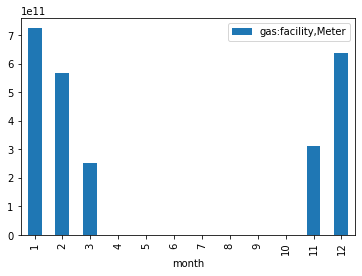

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df3.plot.bar(x=None,y='gas:facility,Meter')